In [1]:
from matplotlib.pylab import plt
import numpy as np
import pickle
from PIL import Image
from imshowpair import imshowpair
import cv2

In [2]:
def ReadImage(path):
    img = plt.imread(path)
    LC = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    img = Image.fromarray(LC,"RGB")
    c_img = img.quantize(method=0,colors=256) 
    palette = c_img.getpalette()
    a_img = np.array(c_img)
    return a_img,palette
def img_to_txt(I):
    sh = I.shape
    im = I.flatten()
    T = ''
    for i in im:
        T += chr(int(i))
    return T,sh

def txt_to_img(T,sh):
    M = []
    for i in T:
        M.append(ord(i))
    return np.array(M).reshape(sh)
def codage_LZW(M):
    w = ""
    code = []
    dict_size = 256
    D = {chr(i): i for i in range(dict_size)}
    for c in M:
        wc = w + c
        if wc in D:
            w = wc
        else:
            code.append(D[w])
            D[wc] = dict_size
            dict_size += 1
            w = c
    if w:
        code.append(D[w])
    return code
def decodage_LZW(M):
    dict_size = 256
    D = {i: chr(i) for i in range(dict_size)}
    w = chr(M[0])
    M = M[1:]
    code = w
    e = w
    for i in M:
        if i in D.keys():
            e = D[i]
        elif i == dict_size:
            e = w + w[0]
        code += e
        D[dict_size] = w + e[0]
        dict_size += 1
        w = e
    return code
def LZW_img(I,op):
    if op == "decodage":
        i_img = txt_to_img(decodage_LZW(I[770:]),I[:2])
        c_img = Image.fromarray(i_img.astype(np.uint8),"P")
        c_img.putpalette(I[2:770].tolist())
        f_img = c_img.convert("RGB")
        return cv2.cvtColor(np.array(f_img), cv2.COLOR_YCrCb2RGB)
    elif op == "codage":
        C = img_to_txt(I[0])
        CC = []
        CC.extend(C[1])
        CC.extend(I[1])
        CC.extend(codage_LZW(C[0]))
        return np.array(CC)
    else :
        return "choix n'exeite pas"

In [3]:
img = ReadImage("sample_1920×1280.bmp")
L = LZW_img(img,"codage")

In [4]:
L

array([  1280,   1920,    196, ..., 545114, 474674, 439047])

In [5]:
with open("hh2.irm",'wb') as op:
    op.write(L.tobytes())

In [6]:
with open("hh2.irm",'rb') as op:
    res = np.frombuffer(op.read(),dtype=int)

In [7]:
res

array([  1280,   1920,    196, ..., 545114, 474674, 439047])

In [8]:
aft_comp = LZW_img(res,"decodage")

In [9]:
org_img = np.array(Image.open("sample_1920×1280.bmp"))

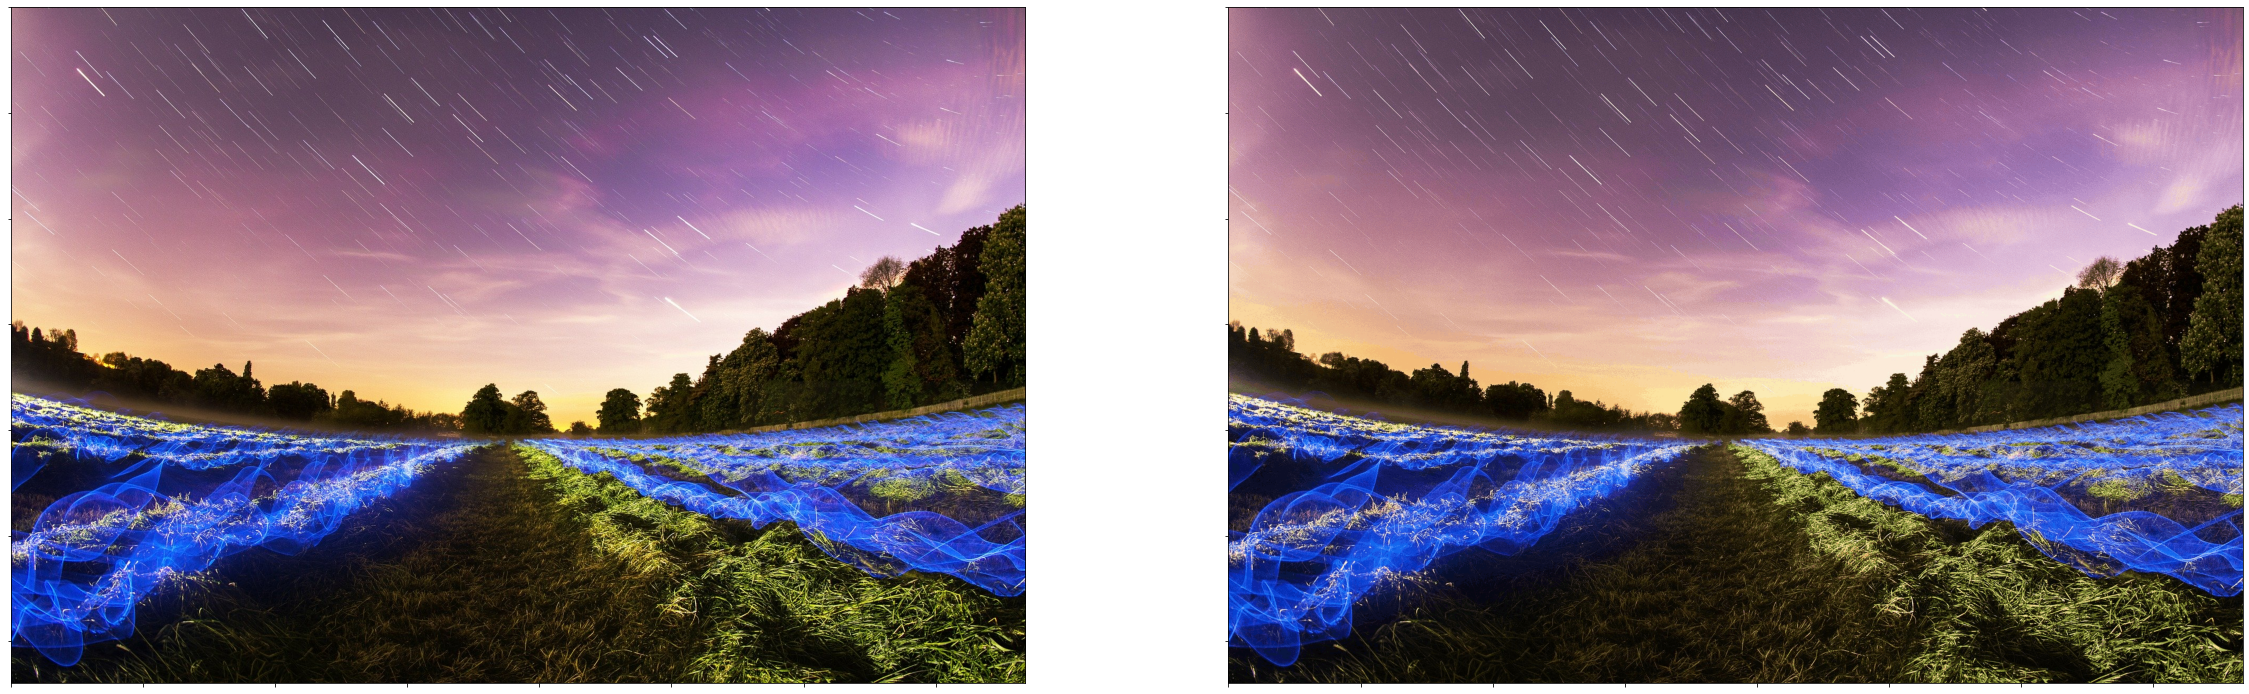

In [10]:
plt.figure(figsize=(40,50))
imshowpair(org_img,aft_comp)

In [11]:
np.mean((org_img-aft_comp)**2)

23.66410929361979